# Group-F : Project #3 – EDFA profile multi-span prediction

# Second Scenario Implementation

# Fatih Temiz
# Ecem Izde Kaya 
# Mobina Mahdavi

#  Reading Dataset & Importing libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import StandardScaler,OneHotEncoder,RobustScaler
from numba import jit
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix,accuracy_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from typing import List
import argparse
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import random
from sklearn.model_selection import train_test_split
import os
import joblib
import torch.nn.functional as F
from sklearn.model_selection import KFold
import shap
import shap.plots


In [28]:
second_df=pd.read_csv("Dataset_2.csv")

In [30]:
second_df=second_df.sort_values(by='profileId',ascending=True)
second_df

profileId  measuredTotalPinEDFA1  measuredTotalPinEDFA2  \
1387          2                   -1.5                   -3.5   
270          12                   -1.7                   -3.8   
973          17                   -1.5                   -3.7   
1101         18                   -1.4                   -3.3   
1388         20                   -1.6                   -3.4   
...         ...                    ...                    ...   
1381      19949                   -1.4                   -3.5   
1383      19962                   -1.5                   -3.4   
1384      19965                   -1.5                   -3.7   
1385      19980                   -1.5                   -3.6   
1386      19984                   -1.5                   -3.5   

      measuredTotalPinEDFA3  measuredTotalPoutEDFA1  measuredTotalPoutEDFA2  \
1387                   -0.1                    15.1                    14.9   
270                    -0.2                    15.1                    14.9   
973                    -0.2                    15.1                    14.9   
1101                    NaN                    15.4                    14.9   
1388                   -0.1                    15.2                    14.9   
...                     ...                     ...                     ...   
1381                   -0.1                    15.4                    14.9   
1383                    NaN                    15.1                    14.9   
1384                   -0.1                    15.1                    14.9   
1385                   -0.1                    15.1                    14.9   
1386                   -0.1                    15.4                    14.9   

      measuredTotalPoutEDFA3  inat152782  inat152829  inat152876  ...  \
1387                    14.9     -21.338     -21.068     -21.638  ...   
270                     14.9     -17.987     -17.667     -18.087  ...   
973                     14.9     -21.168     -20.858     -21.458  ...   
1101                    14.9     -22.294     -22.544     -23.294  ...   
1388                    14.9     -21.448     -20.968     -21.558  ...   
...                      ...         ...         ...         ...  ...   
1381                    14.9     -30.138     -30.388     -30.908  ...   
1383                    14.9     -29.505     -29.325     -29.405  ...   
1384                    14.9     -20.337     -19.737     -20.167  ...   
1385                    14.9     -21.728     -21.408     -21.838  ...   
1386                    14.9     -21.963     -21.463     -21.853  ...   

      outat156260  outat156307  outat156354  outat156401  outat156448  \
1387       -0.506       -0.976       -1.356       -1.886       -2.436   
270        -0.679       -1.369       -1.719       -2.199       -2.849   
973        -0.725       -1.205       -1.685       -2.305       -2.905   
1101       -0.621       -1.171       -1.551       -2.021       -2.621   
1388       -0.178       -0.678       -1.088       -1.588       -2.168   
...           ...          ...          ...          ...          ...   
1381       -1.141       -1.851       -2.331       -2.881       -3.561   
1383        0.790        0.680        0.820        0.860        0.480   
1384       -0.963       -1.513       -1.993       -2.693       -3.283   
1385        0.132       -0.408       -0.578       -1.038       -1.488   
1386       -0.428       -0.928       -1.428       -1.938       -2.448   

      outat156495  outat156542  outat156589  outat156636  outat156683  
1387       -2.926       -3.476       -3.956       -4.516       -6.226  
270        -3.389       -4.099       -4.769       -5.549       -6.979  
973        -3.435       -4.095       -4.665       -5.145       -6.815  
1101       -3.041       -3.581       -4.061       -4.761       -6.741  
1388       -2.578       -3.098       -3.588       -4.278       -6.158  
...           ...          ...          ...          ...          ...  
1381       -3.841 

# Printing unique counts we can see there is no outlier in the dataset

In [33]:
unique_counts_pout_edfa_1 = second_df['measuredTotalPoutEDFA1'].value_counts()

print(unique_counts_pout_edfa_1)


unique_counts_pout_edfa_2 = second_df['measuredTotalPoutEDFA2'].value_counts()

print(unique_counts_pout_edfa_2)


unique_counts_pout_edfa_3 = second_df['measuredTotalPoutEDFA3'].value_counts()

print(unique_counts_pout_edfa_3)

unique_counts_pin_edfa_1 = second_df['measuredTotalPinEDFA1'].value_counts()

print(unique_counts_pin_edfa_1)

unique_counts_pin_edfa_2 = second_df['measuredTotalPinEDFA2'].value_counts()

print(unique_counts_pin_edfa_2)

unique_counts_pin_edfa_3 = second_df['measuredTotalPinEDFA3'].value_counts()

print(unique_counts_pin_edfa_3)

measuredTotalPoutEDFA1
15.1    1170
15.4     661
15.5     270
15.2     228
15.0     155
15.3      11
15.6       5
Name: count, dtype: int64
measuredTotalPoutEDFA2
14.9    2294
14.8     194
15.0      10
17.8       2
Name: count, dtype: int64
measuredTotalPoutEDFA3
14.9    2447
15.0      45
14.8       6
15.1       2
Name: count, dtype: int64
measuredTotalPinEDFA1
-1.5    1098
-1.4     557
-1.6     284
-1.3     155
-1.7     152
-1.2      76
-1.1      53
-1.8      45
-1.9      24
-1.0      21
-0.9      19
-2.0       6
-0.8       5
-0.7       3
-0.6       1
-2.1       1
Name: count, dtype: int64
measuredTotalPinEDFA2
-3.6    598
-3.5    556
-3.4    431
-3.7    342
-3.3    222
-3.2    135
-3.8    103
-3.1     71
-3.9     25
-3.0     12
-4.0      3
-2.9      2
Name: count, dtype: int64
measuredTotalPinEDFA3
-0.1    1703
-0.2     558
-0.3      33
 2.4       2
Name: count, dtype: int64


Since we can not estimate measuredTotalPinEDFA3 , we are dropping rows where measuredTotalPinEDFA3; if it would be measuredTotalPoutEDFA3 we could calculate from the output power profiles

In [36]:
# Check for NaN values in the entire DataFrame
nan_presence_second = second_df.isna()

#  NaN counts per column
nan_counts_second = second_df.isna().sum()


print("\nNaN Counts per Column:")
print(nan_counts_second)
print("total_sum",sum(nan_counts_second))


NaN Counts per Column:
profileId                   0
measuredTotalPinEDFA1       0
measuredTotalPinEDFA2       0
measuredTotalPinEDFA3     204
measuredTotalPoutEDFA1      0
                         ... 
outat156495                 0
outat156542                 0
outat156589                 0
outat156636                 0
outat156683                 0
Length: 175, dtype: int64
total_sum 204


In [38]:
print("Initial missing values per column:")
print(second_df.isnull().sum())

# Drop rows with any NaN values
second_df.dropna(inplace=True)

print("After dropping missing values:")
print(second_df.isnull().sum())

Initial missing values per column:
profileId                   0
measuredTotalPinEDFA1       0
measuredTotalPinEDFA2       0
measuredTotalPinEDFA3     204
measuredTotalPoutEDFA1      0
                         ... 
outat156495                 0
outat156542                 0
outat156589                 0
outat156636                 0
outat156683                 0
Length: 175, dtype: int64
After dropping missing values:
profileId                 0
measuredTotalPinEDFA1     0
measuredTotalPinEDFA2     0
measuredTotalPinEDFA3     0
measuredTotalPoutEDFA1    0
                         ..
outat156495               0
outat156542               0
outat156589               0
outat156636               0
outat156683               0
Length: 175, dtype: int64


In [40]:
second_df

profileId  measuredTotalPinEDFA1  measuredTotalPinEDFA2  \
1387          2                   -1.5                   -3.5   
270          12                   -1.7                   -3.8   
973          17                   -1.5                   -3.7   
1388         20                   -1.6                   -3.4   
1440         24                   -1.4                   -3.5   
...         ...                    ...                    ...   
1380      19938                   -1.6                   -3.6   
1381      19949                   -1.4                   -3.5   
1384      19965                   -1.5                   -3.7   
1385      19980                   -1.5                   -3.6   
1386      19984                   -1.5                   -3.5   

      measuredTotalPinEDFA3  measuredTotalPoutEDFA1  measuredTotalPoutEDFA2  \
1387                   -0.1                    15.1                    14.9   
270                    -0.2                    15.1                    14.9   
973                    -0.2                    15.1                    14.9   
1388                   -0.1                    15.2                    14.9   
1440                   -0.1                    15.4                    14.9   
...                     ...                     ...                     ...   
1380                   -0.1                    15.2                    14.9   
1381                   -0.1                    15.4                    14.9   
1384                   -0.1                    15.1                    14.9   
1385                   -0.1                    15.1                    14.9   
1386                   -0.1                    15.4                    14.9   

      measuredTotalPoutEDFA3  inat152782  inat152829  inat152876  ...  \
1387                    14.9     -21.338     -21.068     -21.638  ...   
270                     14.9     -17.987     -17.667     -18.087  ...   
973                     14.9     -21.168     -20.858     -21.458  ...   
1388                    14.9     -21.448     -20.968     -21.558  ...   
1440                    14.9     -23.415     -23.925     -23.275  ...   
...                      ...         ...         ...         ...  ...   
1380                    14.9     -24.868     -24.228     -24.928  ...   
1381                    14.9     -30.138     -30.388     -30.908  ...   
1384                    14.9     -20.337     -19.737     -20.167  ...   
1385                    14.9     -21.728     -21.408     -21.838  ...   
1386                    14.9     -21.963     -21.463     -21.853  ...   

      outat156260  outat156307  outat156354  outat156401  outat156448  \
1387       -0.506       -0.976       -1.356       -1.886       -2.436   
270        -0.679       -1.369       -1.719       -2.199       -2.849   
973        -0.725       -1.205       -1.685       -2.305       -2.905   
1388       -0.178       -0.678       -1.088       -1.588       -2.168   
1440       -0.143       -0.713       -0.913       -1.323       -1.753   
...           ...          ...          ...          ...          ...   
1380       -0.138       -0.698       -1.338       -1.978       -2.668   
1381       -1.141       -1.851       -2.331       -2.881       -3.561   
1384       -0.963       -1.513       -1.993       -2.693       -3.283   
1385        0.132       -0.408       -0.578       -1.038       -1.488   
1386       -0.428       -0.928       -1.428       -1.938       -2.448   

      outat156495  outat156542  outat156589  outat156636  outat156683  
1387       -2.926       -3.476       -3.956       -4.516       -6.226  
270        -3.389       -4.099       -4.769       -5.549       -6.979  
973        -3.435       -4.095       -4.665       -5.145       -6.815  
1388       -2.578       -3.098       -3.588       -4.278       -6.158  
1440       -1.963       -2.333       -2.833       -3.763       -5.653  
...           ...          ...          ...          ...          ...  
1380       -3.068 

In [42]:
df=second_df.iloc[:,1:]
df

measuredTotalPinEDFA1  measuredTotalPinEDFA2  measuredTotalPinEDFA3  \
1387                   -1.5                   -3.5                   -0.1   
270                    -1.7                   -3.8                   -0.2   
973                    -1.5                   -3.7                   -0.2   
1388                   -1.6                   -3.4                   -0.1   
1440                   -1.4                   -3.5                   -0.1   
...                     ...                    ...                    ...   
1380                   -1.6                   -3.6                   -0.1   
1381                   -1.4                   -3.5                   -0.1   
1384                   -1.5                   -3.7                   -0.1   
1385                   -1.5                   -3.6                   -0.1   
1386                   -1.5                   -3.5                   -0.1   

      measuredTotalPoutEDFA1  measuredTotalPoutEDFA2  measuredTotalPoutEDFA3  \
1387                    15.1                    14.9                    14.9   
270                     15.1                    14.9                    14.9   
973                     15.1                    14.9                    14.9   
1388                    15.2                    14.9                    14.9   
1440                    15.4                    14.9                    14.9   
...                      ...                     ...                     ...   
1380                    15.2                    14.9                    14.9   
1381                    15.4                    14.9                    14.9   
1384                    15.1                    14.9                    14.9   
1385                    15.1                    14.9                    14.9   
1386                    15.4                    14.9                    14.9   

      inat152782  inat152829  inat152876  inat152923  ...  outat156260  \
1387     -21.338     -21.068     -21.638     -20.558  ...       -0.506   
270      -17.987     -17.667     -18.087     -17.497  ...       -0.679   
973      -21.168     -20.858     -21.458     -20.538  ...       -0.725   
1388     -21.448     -20.968     -21.558     -20.518  ...       -0.178   
1440     -23.415     -23.925     -23.275     -23.305  ...       -0.143   
...          ...         ...         ...         ...  ...          ...   
1380     -24.868     -24.228     -24.928     -24.128  ...       -0.138   
1381     -30.138     -30.388     -30.908     -31.318  ...       -1.141   
1384     -20.337     -19.737     -20.167     -19.847  ...       -0.963   
1385     -21.728     -21.408     -21.838     -21.928  ...        0.132   
1386     -21.963     -21.463     -21.853     -21.003  ...       -0.428   

      outat156307  outat156354  outat156401  outat156448  outat156495  \
1387       -0.976       -1.356       -1.886       -2.436       -2.926   
270        -1.369       -1.719       -2.199       -2.849       -3.389   
973        -1.205       -1.685       -2.305       -2.905       -3.435   
1388       -0.678       -1.088       -1.588       -2.168       -2.578   
1440       -0.713       -0.913       -1.323       -1.753       -1.963   
...           ...          ...          ...          ...          ...   
1380       -0.698       -1.338       -1.978       -2.668       -3.068   
1381       -1.851       -2.331       -2.881       -3.561       -3.841   
1384       -1.513       -1.993       -2.693       -3.283       -3.783   
1385       -0.408       -0.578       -1.038       -1.488       -1.788   
1386       -0.928       -1.428       -1.938       -2.448       -2.888   

      outat156542  outat156589  outat156636  outat156683  
1387       -3.476       -3.956       -4.516       -6.226  
270        -4.099       -4.769       -5.549       -6.979  
973        -4.095       -4.665       -5.145       -6.815  
1388       -3.098       -3.588       -4.278       -6.158  
1440       -2.333       -2.833       -3.763       -5.653  


Histogram of each feature; we can see that most of thems are following normal distribution

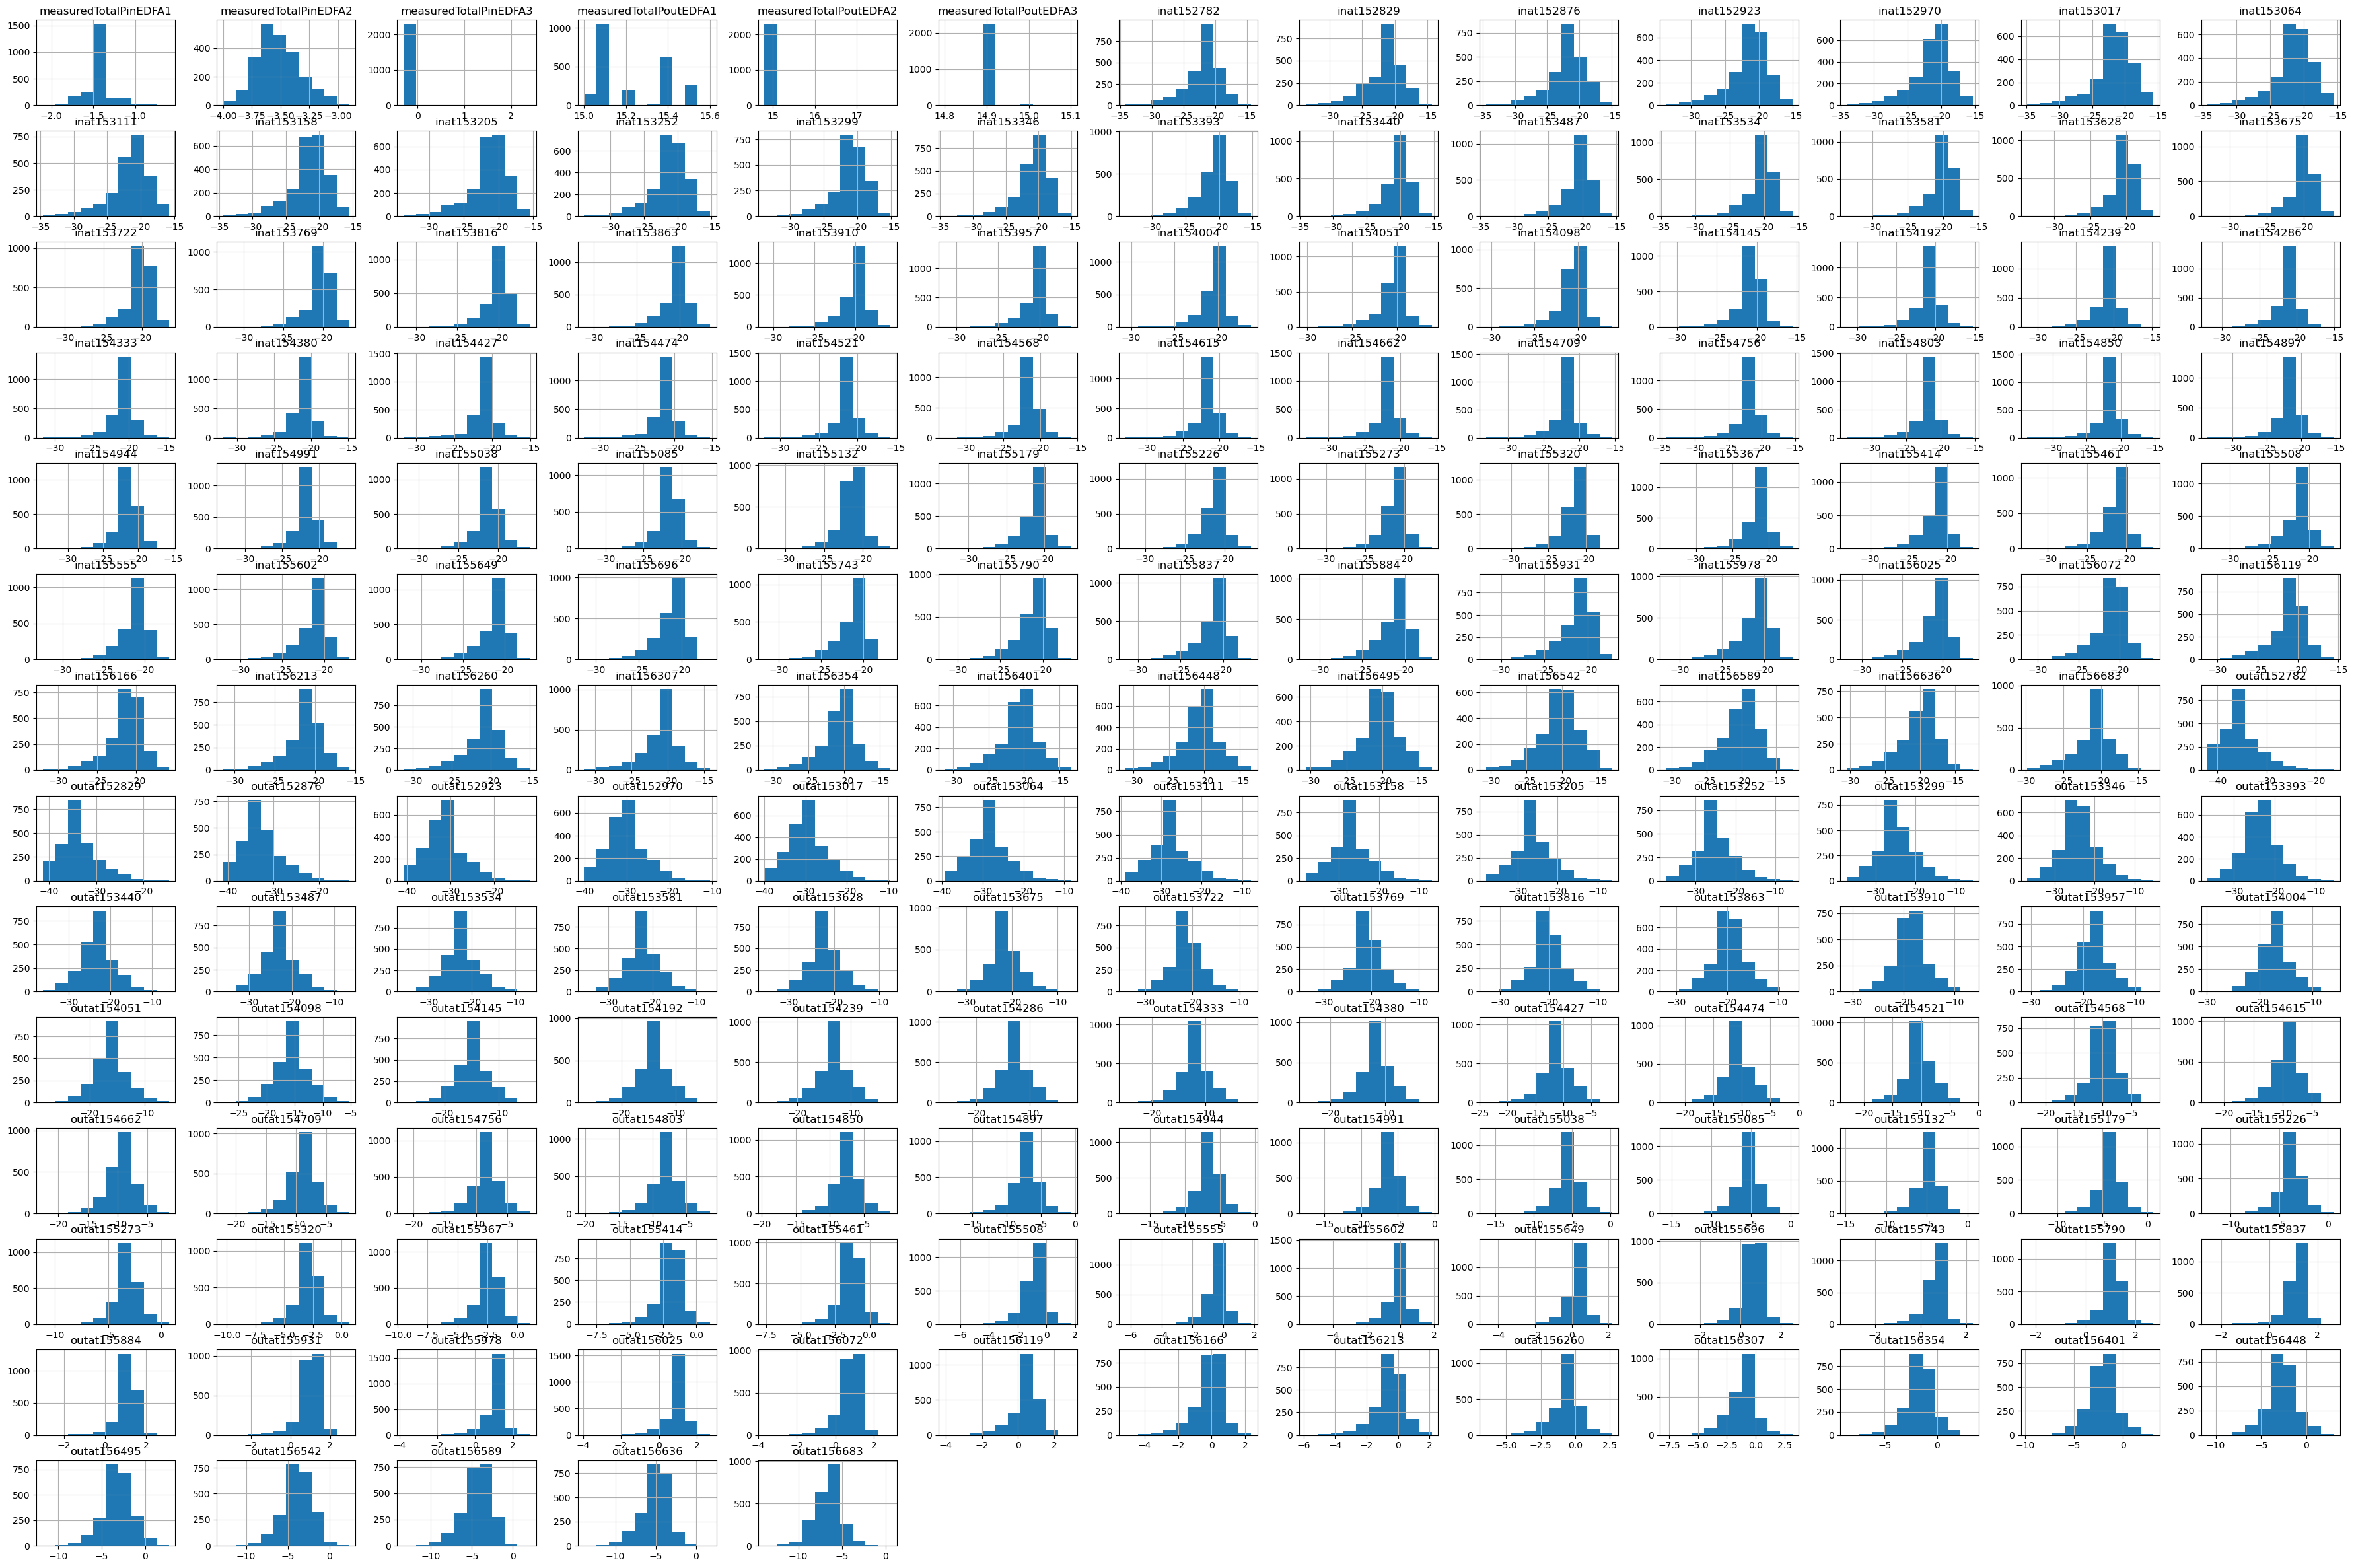

In [45]:
df.hist(figsize=(45,30))
plt.show()



In [46]:
X_first_part = df.iloc[:, :90]

# Select the last 2 columns
#X_last_part = df.iloc[:, -2:]

# Concatenate the two parts horizontally
#X = pd.concat([X_first_part, X_last_part], axis=1)
X=X_first_part.iloc[:, [0, *range(5, X_first_part.shape[1])]]
# Select y (columns between the first 90 and last 2)
y = df.iloc[:, 90:]

In [47]:
y

outat152782  outat152829  outat152876  outat152923  outat152970  \
1387      -35.716      -34.066      -33.346      -31.416      -30.436   
270       -27.039      -25.099      -24.189      -22.459      -21.509   
973       -35.565      -33.855      -33.095      -31.355      -30.275   
1388      -36.628      -34.978      -34.168      -32.398      -31.188   
1440      -38.263      -37.413      -35.943      -34.903      -33.653   
...           ...          ...          ...          ...          ...   
1380      -39.698      -38.488      -37.818      -36.478      -35.598   
1381      -40.921      -40.411      -40.081      -39.761      -39.001   
1384      -33.683      -31.763      -30.703      -29.393      -27.983   
1385      -37.018      -35.498      -34.668      -33.678      -32.688   
1386      -36.668      -34.938      -34.128      -32.458      -31.758   

      outat153017  outat153064  outat153111  outat153158  outat153205  ...  \
1387      -30.016      -28.966      -28.016      -27.196      -26.196  ...   
270       -20.509      -19.479      -18.799      -18.209      -17.409  ...   
973       -29.915      -28.835      -27.935      -27.165      -26.185  ...   
1388      -30.818      -29.628      -28.718      -27.898      -26.938  ...   
1440      -32.963      -31.943      -31.163      -30.323      -29.473  ...   
...           ...          ...          ...          ...          ...  ...   
1380      -34.848      -33.818      -32.978      -32.168      -30.948  ...   
1381      -38.661      -38.111      -37.601      -36.871      -36.341  ...   
1384      -27.043      -25.843      -25.183      -24.223      -23.643  ...   
1385      -31.818      -30.758      -30.108      -29.198      -28.438  ...   
1386      -30.978      -29.698      -28.888      -27.928      -27.088  ...   

      outat156260  outat156307  outat156354  outat156401  outat156448  \
1387       -0.506       -0.976       -1.356       -1.886       -2.436   
270        -0.679       -1.369       -1.719       -2.199       -2.849   
973        -0.725       -1.205       -1.685       -2.305       -2.905   
1388       -0.178       -0.678       -1.088       -1.588       -2.168   
1440       -0.143       -0.713       -0.913       -1.323       -1.753   
...           ...          ...          ...          ...          ...   
1380       -0.138       -0.698       -1.338       -1.978       -2.668   
1381       -1.141       -1.851       -2.331       -2.881       -3.561   
1384       -0.963       -1.513       -1.993       -2.693       -3.283   
1385        0.132       -0.408       -0.578       -1.038       -1.488   
1386       -0.428       -0.928       -1.428       -1.938       -2.448   

      outat156495  outat156542  outat156589  outat156636  outat156683  
1387       -2.926       -3.476       -3.956       -4.516       -6.226  
270        -3.389       -4.099       -4.769       -5.549       -6.979  
973        -3.435       -4.095       -4.665       -5.145       -6.815  
1388       -2.578       -3.098       -3.588       -4.278       -6.158  
1440       -1.963       -2.333       -2.833       -3.763       -5.653  
...           ...          ...          ...          ...          ...  
1380       -3.068       -3.588       -4.218       -5.078       -7.118  
1381       -3.841       -4.221       -4.661       -5.471       -7.811  
1384       -3.783       -4.543       -5.063       -5.663       -6.873  
1385       -1.788       -2.208       -2.718       -3.588       -5.238  
1386       -2.888       -3.458       -3.898       -4.418       -6.158  

[2296 rows x 84 columns]

In [48]:
class CentralizedModel(nn.Module):
    def __init__(self, input_dim=86, hidden_units=[256, 128], activation_func=F.relu):
        super(CentralizedModel, self).__init__()
        self.layers = nn.Sequential()
        for i in range(len(hidden_units)):
            if i == 0:
                self.layers.add_module(f"linear_{i}", nn.Linear(input_dim, hidden_units[i]))
            else:
                self.layers.add_module(f"linear_{i}", nn.Linear(hidden_units[i-1], hidden_units[i]))
            self.layers.add_module(f"activation_{i}", activation_func())
        self.output_layer = nn.Linear(hidden_units[-1], 84)

    def forward(self, x):
        x = self.layers(x)
        x = self.output_layer(x)
        return x

In [49]:
X

measuredTotalPinEDFA1  measuredTotalPoutEDFA3  inat152782  inat152829  \
1387                   -1.5                    14.9     -21.338     -21.068   
270                    -1.7                    14.9     -17.987     -17.667   
973                    -1.5                    14.9     -21.168     -20.858   
1388                   -1.6                    14.9     -21.448     -20.968   
1440                   -1.4                    14.9     -23.415     -23.925   
...                     ...                     ...         ...         ...   
1380                   -1.6                    14.9     -24.868     -24.228   
1381                   -1.4                    14.9     -30.138     -30.388   
1384                   -1.5                    14.9     -20.337     -19.737   
1385                   -1.5                    14.9     -21.728     -21.408   
1386                   -1.5                    14.9     -21.963     -21.463   

      inat152876  inat152923  inat152970  inat153017  inat153064  inat153111  \
1387     -21.638     -20.558     -20.868     -21.408     -21.268     -21.178   
270      -18.087     -17.497     -17.797     -17.777     -17.797     -17.897   
973      -21.458     -20.538     -20.688     -21.288     -21.158     -21.088   
1388     -21.558     -20.518     -20.578     -21.258     -21.068     -21.008   
1440     -23.275     -23.305     -22.975     -23.325     -23.065     -23.245   
...          ...         ...         ...         ...         ...         ...   
1380     -24.928     -24.128     -24.478     -24.558     -24.278     -24.238   
1381     -30.908     -31.318     -31.008     -32.138     -31.328     -31.798   
1384     -20.167     -19.847     -19.697     -19.797     -19.607     -19.807   
1385     -21.838     -21.928     -22.068     -22.158     -22.068     -22.378   
1386     -21.853     -21.003     -21.733     -21.783     -21.503     -21.593   

      ...  inat156260  inat156307  inat156354  inat156401  inat156448  \
1387  ...     -20.528     -20.518     -20.398     -20.348     -20.268   
270   ...     -23.927     -24.067     -23.737     -23.637     -23.507   
973   ...     -20.888     -20.848     -20.788     -20.788     -20.738   
1388  ...     -19.708     -19.778     -19.588     -19.548     -19.428   
1440  ...     -19.215     -19.335     -18.945     -18.785     -18.625   
...   ...         ...         ...         ...         ...         ...   
1380  ...     -18.828     -18.968     -18.998     -19.088     -19.168   
1381  ...     -19.398     -19.628     -19.628     -19.588     -19.618   
1384  ...     -21.897     -21.977     -21.787     -21.847     -21.837   
1385  ...     -19.328     -19.348     -18.998     -18.828     -18.668   
1386  ...     -20.253     -20.253     -20.203     -20.113     -19.993   

      inat156495  inat156542  inat156589  inat156636  inat156683  
1387     -20.138     -19.998     -19.698     -19.478     -20.508  
270      -23.307     -23.227     -23.127     -23.077     -23.677  
973      -20.618     -20.558     -20.358     -20.108     -21.018  
1388     -19.228     -19.008     -18.758     -18.698     -19.818  
1440     -18.145     -17.805     -17.595     -17.835     -18.955  
...          ...         ...         ...         ...         ...  
1380     -18.958     -18.728     -18.658     -18.848     -20.188  
1381     -19.278     -18.978     -18.718     -18.838     -20.488  
1384     -21.607     -21.597     -21.437     -21.277     -21.687  
1385     -18.338     -18.028     -17.818     -17.978     -18.888  
1386     -19.823     -19.613     -19.313     -19.133     -20.123  

[2296 rows x 86 columns]

# Histogram of scaled features

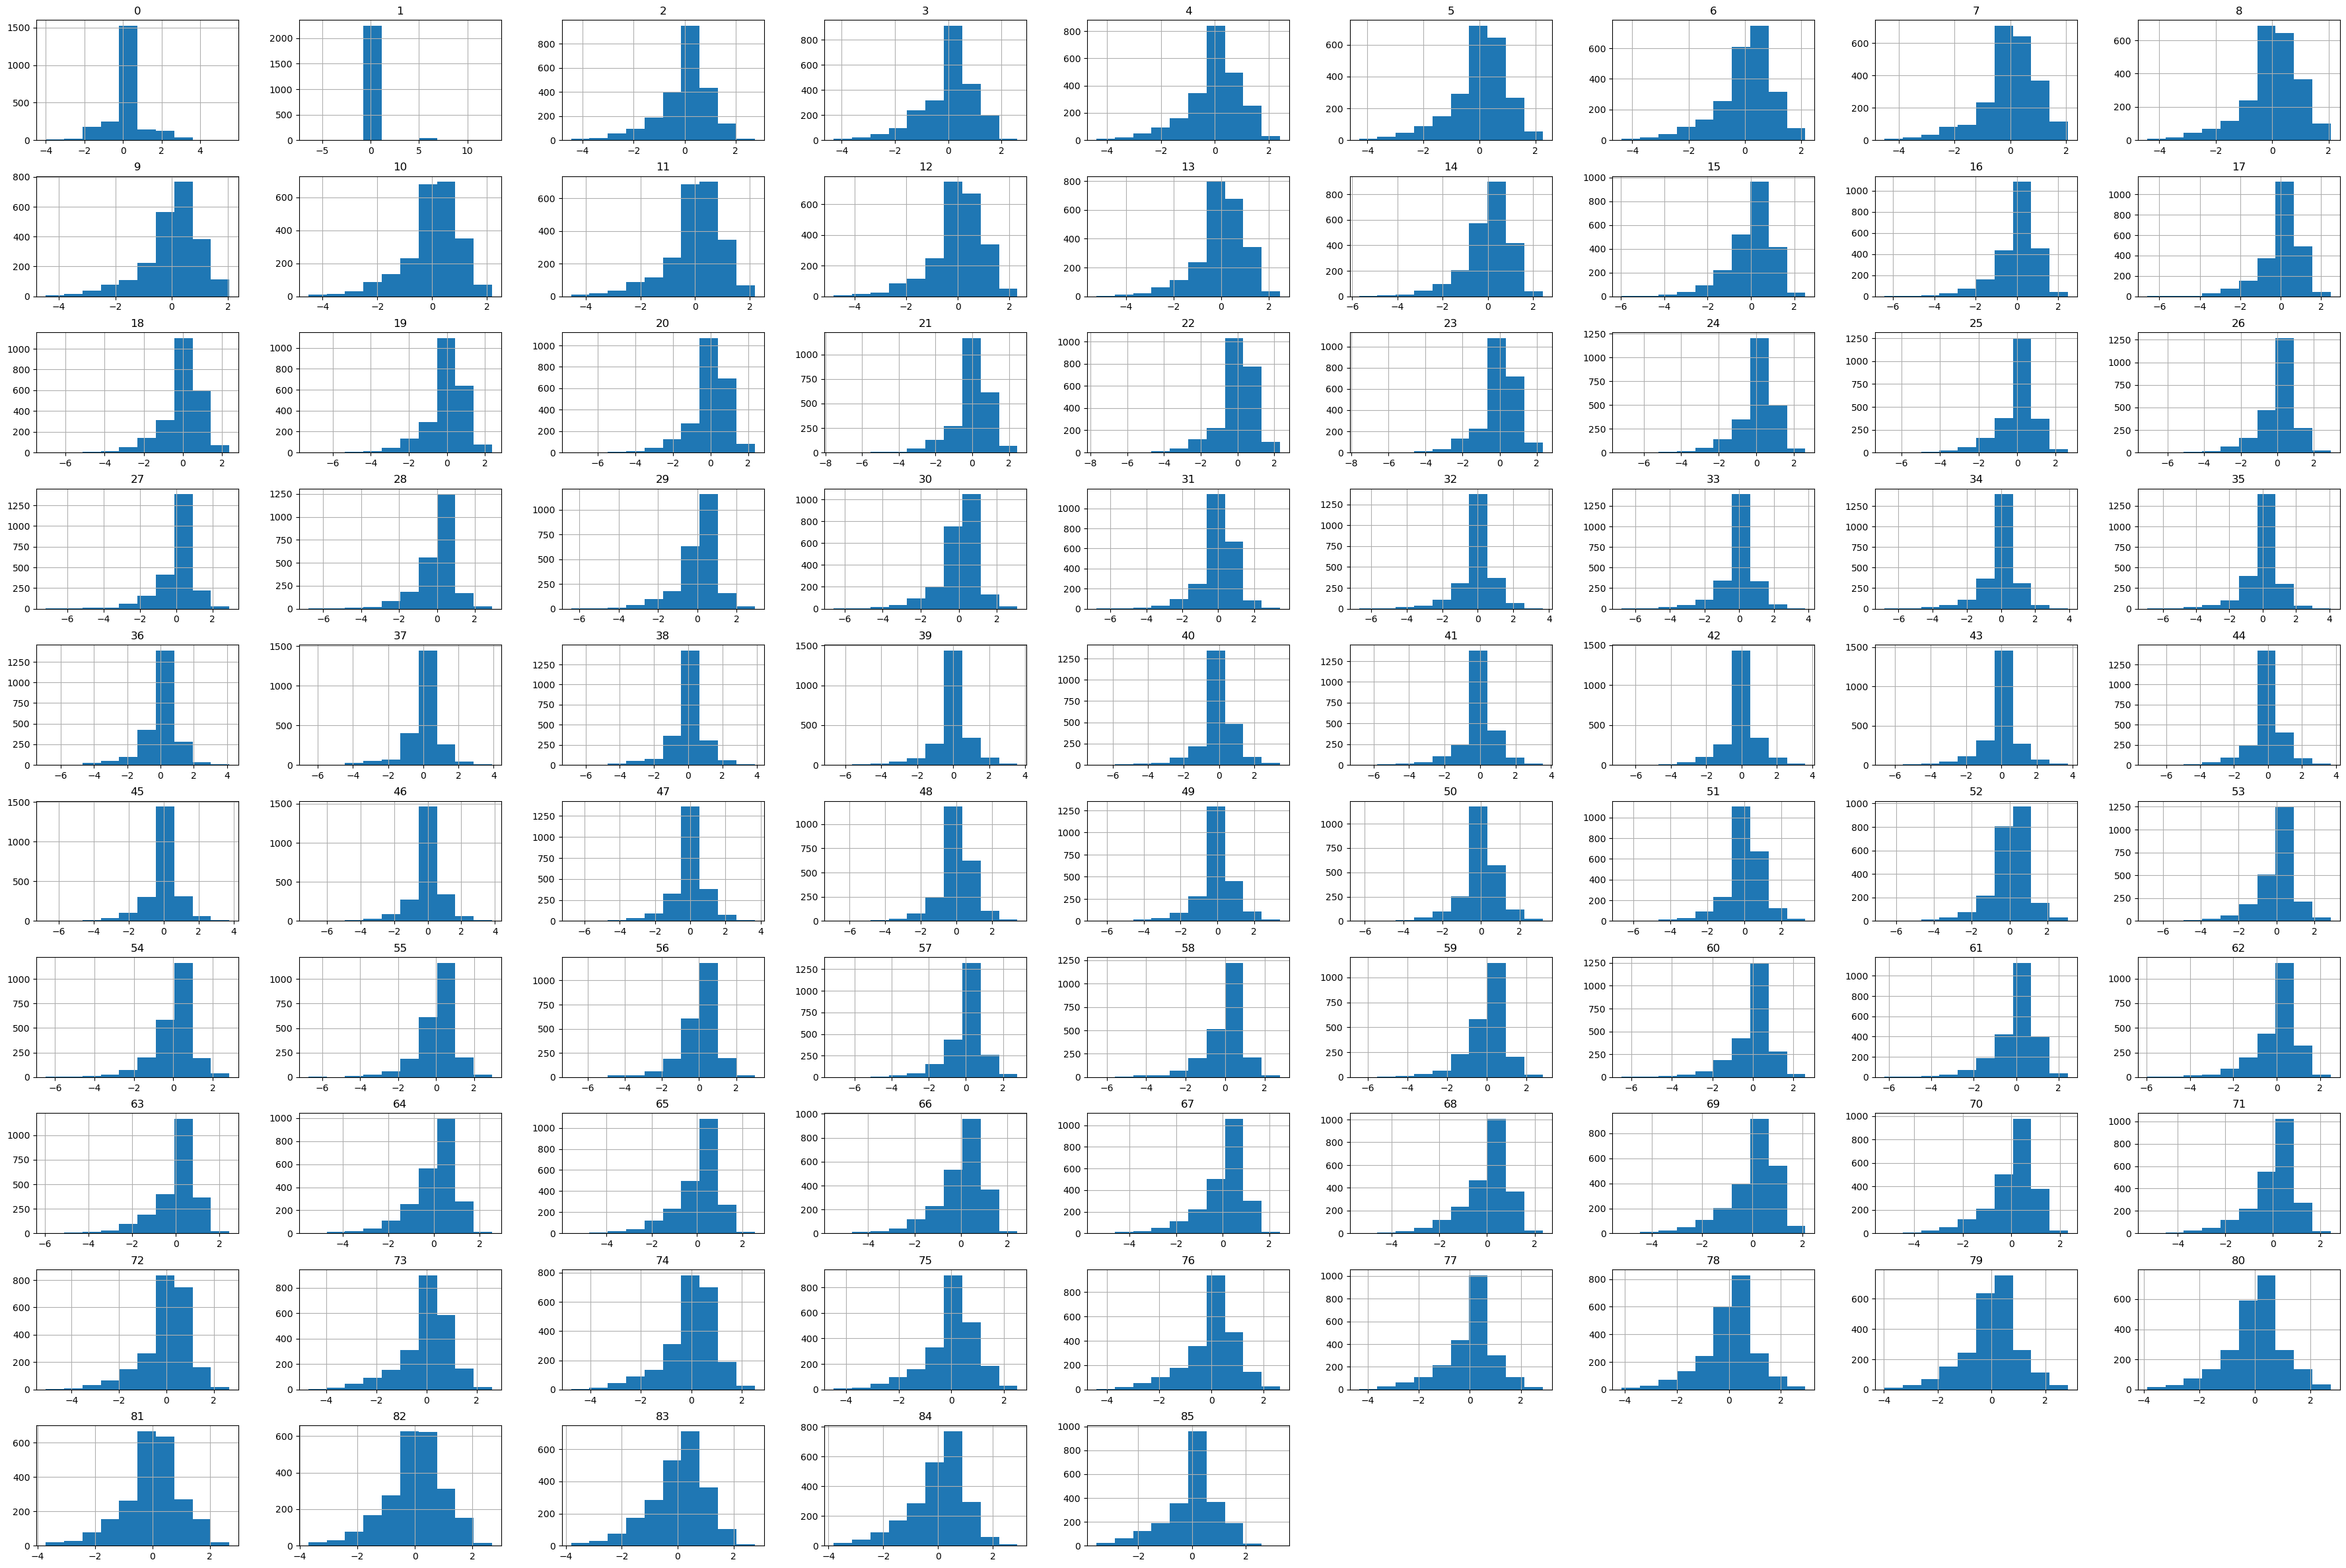

In [59]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X)
X_train_scaled_df=pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(figsize=(45,30))
plt.show()

In [50]:
y

outat152782  outat152829  outat152876  outat152923  outat152970  \
1387      -35.716      -34.066      -33.346      -31.416      -30.436   
270       -27.039      -25.099      -24.189      -22.459      -21.509   
973       -35.565      -33.855      -33.095      -31.355      -30.275   
1388      -36.628      -34.978      -34.168      -32.398      -31.188   
1440      -38.263      -37.413      -35.943      -34.903      -33.653   
...           ...          ...          ...          ...          ...   
1380      -39.698      -38.488      -37.818      -36.478      -35.598   
1381      -40.921      -40.411      -40.081      -39.761      -39.001   
1384      -33.683      -31.763      -30.703      -29.393      -27.983   
1385      -37.018      -35.498      -34.668      -33.678      -32.688   
1386      -36.668      -34.938      -34.128      -32.458      -31.758   

      outat153017  outat153064  outat153111  outat153158  outat153205  ...  \
1387      -30.016      -28.966      -28.016      -27.196      -26.196  ...   
270       -20.509      -19.479      -18.799      -18.209      -17.409  ...   
973       -29.915      -28.835      -27.935      -27.165      -26.185  ...   
1388      -30.818      -29.628      -28.718      -27.898      -26.938  ...   
1440      -32.963      -31.943      -31.163      -30.323      -29.473  ...   
...           ...          ...          ...          ...          ...  ...   
1380      -34.848      -33.818      -32.978      -32.168      -30.948  ...   
1381      -38.661      -38.111      -37.601      -36.871      -36.341  ...   
1384      -27.043      -25.843      -25.183      -24.223      -23.643  ...   
1385      -31.818      -30.758      -30.108      -29.198      -28.438  ...   
1386      -30.978      -29.698      -28.888      -27.928      -27.088  ...   

      outat156260  outat156307  outat156354  outat156401  outat156448  \
1387       -0.506       -0.976       -1.356       -1.886       -2.436   
270        -0.679       -1.369       -1.719       -2.199       -2.849   
973        -0.725       -1.205       -1.685       -2.305       -2.905   
1388       -0.178       -0.678       -1.088       -1.588       -2.168   
1440       -0.143       -0.713       -0.913       -1.323       -1.753   
...           ...          ...          ...          ...          ...   
1380       -0.138       -0.698       -1.338       -1.978       -2.668   
1381       -1.141       -1.851       -2.331       -2.881       -3.561   
1384       -0.963       -1.513       -1.993       -2.693       -3.283   
1385        0.132       -0.408       -0.578       -1.038       -1.488   
1386       -0.428       -0.928       -1.428       -1.938       -2.448   

      outat156495  outat156542  outat156589  outat156636  outat156683  
1387       -2.926       -3.476       -3.956       -4.516       -6.226  
270        -3.389       -4.099       -4.769       -5.549       -6.979  
973        -3.435       -4.095       -4.665       -5.145       -6.815  
1388       -2.578       -3.098       -3.588       -4.278       -6.158  
1440       -1.963       -2.333       -2.833       -3.763       -5.653  
...           ...          ...          ...          ...          ...  
1380       -3.068       -3.588       -4.218       -5.078       -7.118  
1381       -3.841       -4.221       -4.661       -5.471       -7.811  
1384       -3.783       -4.543       -5.063       -5.663       -6.873  
1385       -1.788       -2.208       -2.718       -3.588       -5.238  
1386       -2.888       -3.458       -3.898       -4.418       -6.158  

[2296 rows x 84 columns]

# k fold cross validation for selecting hyperparameters : activation function & number of hidden layers & number of neurons per hidden layer 

In [69]:
# Parameters
k_folds = 5
num_epochs = 50
batch_size = 32

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer):

    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            inputs, targets = batch
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    model.eval()
    total_loss = 0
    total_mae = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, targets = batch
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            mae = torch.mean(torch.abs(outputs - targets))
            total_loss += loss.item()
            total_mae += mae.item()
    
    return total_loss / len(val_loader), total_mae / len(val_loader)

# Hyperparameters
activations = [nn.ReLU, nn.Tanh, nn.Sigmoid]
hidden_configs = [[256, 128], [512, 256, 128]]

best_l1_loss = float('inf')
best_mse_loss = float('inf')
best_l1_config = None
best_mse_config = None

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_val_scaled = scaler_X.transform(X_val)

    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train)
    y_val_scaled = scaler_y.transform(y_val)

    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32)
    print(X_train_tensor.shape, y_train_tensor.shape, X_val_tensor.shape, y_val_tensor.shape)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    for activation in activations:
        for hidden_layers in hidden_configs:
            print(f"Testing config: Activation={activation.__name__}, Layers={hidden_layers}")

            # Train with L1Loss
            model = CentralizedModel(input_dim=X_train.shape[1], hidden_units=hidden_layers, activation_func=activation)
            criterion = nn.L1Loss()
            optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
            loss, mae = train_and_evaluate(model, train_loader, val_loader, criterion, optimizer)
            print(f"L1Loss for config on fold {fold+1}: {loss}, MAE: {mae}")

            if mae < best_l1_loss:
                best_l1_loss = mae
                best_l1_config = (activation.__name__, hidden_layers)

            # Train with MSELoss
            model = CentralizedModel(input_dim=X_train.shape[1], hidden_units=hidden_layers, activation_func=activation)
            criterion = nn.MSELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
            loss, mae = train_and_evaluate(model, train_loader, val_loader, criterion, optimizer)
            print(f"MSELoss for config on fold {fold+1}: {loss}, MAE: {mae}")

            if mae < best_mse_loss:
                best_mse_loss = mae
                best_mse_config = (activation.__name__, hidden_layers)

print(f"Best L1 configuration: Activation={best_l1_config[0]}, Layers={best_l1_config[1]}, MAE={best_l1_loss}")
print(f"Best MSE configuration: Activation={best_mse_config[0]}, Layers={best_mse_config[1]}, MAE={best_mse_loss}")


Fold 1
torch.Size([1836, 86]) torch.Size([1836, 84]) torch.Size([460, 86]) torch.Size([460, 84])
Testing config: Activation=ReLU, Layers=[256, 128]
L1Loss for config on fold 1: 0.06658476938803991, MAE: 0.06658476938803991
MSELoss for config on fold 1: 0.010037775120387475, MAE: 0.06356046249469122
Testing config: Activation=ReLU, Layers=[512, 256, 128]
L1Loss for config on fold 1: 0.07499982764323553, MAE: 0.07499982764323553
MSELoss for config on fold 1: 0.012758782816429932, MAE: 0.07269367476304373
Testing config: Activation=Tanh, Layers=[256, 128]
L1Loss for config on fold 1: 0.06670127908388773, MAE: 0.06670127908388773
MSELoss for config on fold 1: 0.01275327301894625, MAE: 0.06549804732203483
Testing config: Activation=Tanh, Layers=[512, 256, 128]
L1Loss for config on fold 1: 0.07595655769109726, MAE: 0.07595655769109726
MSELoss for config on fold 1: 0.014905688414971034, MAE: 0.07018381332357725
Testing config: Activation=Sigmoid, Layers=[256, 128]
L1Loss for config on fold 1:

# Training model with best hyperparameter activation function: ReLU, Hidden Layer: [256,128] and MSE Losss


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

(1744, 86) (552, 86) (1744, 84) (552, 84)


In [73]:
model = CentralizedModel(input_dim=X_train.shape[1], hidden_units=[256, 128], activation_func=nn.ReLU)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        model.train()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 0.1133
Epoch [2/50], Loss: 0.0243
Epoch [3/50], Loss: 0.0255
Epoch [4/50], Loss: 0.0343
Epoch [5/50], Loss: 0.0354
Epoch [6/50], Loss: 0.0352
Epoch [7/50], Loss: 0.0241
Epoch [8/50], Loss: 0.0133
Epoch [9/50], Loss: 0.0151
Epoch [10/50], Loss: 0.0247
Epoch [11/50], Loss: 0.0264
Epoch [12/50], Loss: 0.0140
Epoch [13/50], Loss: 0.0155
Epoch [14/50], Loss: 0.0133
Epoch [15/50], Loss: 0.0095
Epoch [16/50], Loss: 0.0140
Epoch [17/50], Loss: 0.0097
Epoch [18/50], Loss: 0.0098
Epoch [19/50], Loss: 0.0162
Epoch [20/50], Loss: 0.0090
Epoch [21/50], Loss: 0.0084
Epoch [22/50], Loss: 0.0118
Epoch [23/50], Loss: 0.0113
Epoch [24/50], Loss: 0.0088
Epoch [25/50], Loss: 0.0084
Epoch [26/50], Loss: 0.0117
Epoch [27/50], Loss: 0.0131
Epoch [28/50], Loss: 0.0094
Epoch [29/50], Loss: 0.0099
Epoch [30/50], Loss: 0.0106
Epoch [31/50], Loss: 0.0158
Epoch [32/50], Loss: 0.0109
Epoch [33/50], Loss: 0.0068
Epoch [34/50], Loss: 0.0096
Epoch [35/50], Loss: 0.0085
Epoch [36/50], Loss: 0.0100
E

In [75]:
def test_and_rescale(model, test_loader, scaler_y, criterion):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():  # No need to track gradients
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            all_predictions.append(outputs)
            all_targets.append(targets)
    
    # Concatenate all batches
    predictions_scaled = torch.cat(all_predictions).cpu().numpy()
    targets_scaled = torch.cat(all_targets).cpu().numpy()
    
    # Rescale predictions and targets to original scale
    predictions = scaler_y.inverse_transform(predictions_scaled)
    targets = scaler_y.inverse_transform(targets_scaled)
    
    # Calculate average loss and other metrics
    average_loss = total_loss / len(test_loader)
    mse = mean_squared_error(targets, predictions)
    mae = mean_absolute_error(targets, predictions)  # Calculate MAE
    
    return average_loss, mse, mae, predictions, targets



# Evaluate the model and rescale predictions
test_loss, mse, mae,predictions, actuals = test_and_rescale(model, test_loader, scaler_y, criterion)
print(f"Test Loss: {test_loss:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


Test Loss: 0.0115
Mean Squared Error: 0.0305
Mean Absolute Error: 0.1183


In [41]:
predictions

array([[-40.270187 , -39.217087 , -38.80559  , ...,  -2.2191894,
         -3.0993624,  -4.592043 ],
       [-38.347843 , -37.160473 , -36.33541  , ...,  -2.8150358,
         -3.6842446,  -5.6702647],
       [-33.62873  , -32.28015  , -30.701958 , ...,  -3.2593992,
         -3.9042978,  -5.6724014],
       ...,
       [-39.442135 , -38.619125 , -38.953773 , ...,  -4.464099 ,
         -5.480518 ,  -7.3727617],
       [-38.47381  , -37.174732 , -36.773815 , ...,  -6.9735994,
         -7.7383404,  -8.780159 ],
       [-28.350817 , -26.55047  , -25.35811  , ...,  -7.4287524,
         -8.311176 ,  -9.298157 ]], dtype=float32)

In [42]:
actuals

array([[-40.481    , -39.331    , -38.801    , ...,  -2.361    ,
         -3.2510002,  -4.651    ],
       [-38.496    , -37.526    , -36.326    , ...,  -2.736    ,
         -3.706    ,  -5.716    ],
       [-33.666    , -32.156    , -30.796    , ...,  -3.606    ,
         -4.166    ,  -5.896    ],
       ...,
       [-40.178    , -39.178    , -38.888    , ...,  -4.438    ,
         -5.258    ,  -7.488    ],
       [-38.849    , -37.409    , -36.659    , ...,  -7.199    ,
         -7.869    ,  -8.969    ],
       [-28.628    , -26.817999 , -25.348    , ...,  -7.448    ,
         -8.1779995,  -8.788    ]], dtype=float32)

In [43]:
predictions_df=pd.DataFrame(predictions)
actuals_df=pd.DataFrame(actuals)

In [44]:
predictions_df

0          1          2          3          4          5   \
0   -40.270187 -39.217087 -38.805592 -37.636623 -36.836094 -36.311127   
1   -38.347843 -37.160473 -36.335411 -34.966831 -34.110367 -33.255138   
2   -33.628731 -32.280151 -30.701958 -29.659475 -28.470659 -27.685534   
3   -37.042801 -35.398060 -34.692780 -33.170475 -32.283913 -31.444160   
4   -39.634724 -38.509060 -38.048996 -37.234859 -36.306213 -36.306831   
..         ...        ...        ...        ...        ...        ...   
547 -39.610157 -38.372738 -37.810860 -36.415821 -35.650764 -35.352402   
548 -38.665035 -37.318913 -36.861176 -35.608490 -34.606651 -34.095051   
549 -39.442135 -38.619125 -38.953773 -37.384533 -37.347805 -36.838524   
550 -38.473808 -37.174732 -36.773815 -35.599483 -34.498055 -33.960579   
551 -28.350817 -26.550470 -25.358110 -23.928844 -22.448050 -21.737907   

            6          7          8          9   ...        74        75  \
0   -35.503048 -34.796494 -33.999958 -33.161873  ...  0.217298 -0.039219   
1   -32.361851 -31.337805 -30.648987 -29.427670  ... -0.024064 -0.526787   
2   -26.384796 -25.675150 -24.777660 -24.263109  ...  0.099790 -0.293682   
3   -30.385057 -29.461311 -28.675640 -27.629223  ... -0.263665 -0.769798   
4   -36.036144 -35.800854 -34.925362 -34.497986  ...  1.756504  1.700190   
..         ...        ...        ...        ...  ...       ...       ...   
547 -34.891888 -33.904572 -33.548832 -32.750755  ...  2.145494  2.397699   
548 -33.130054 -31.973812 -31.289913 -30.253672  ... -1.061422 -1.823224   
549 -36.601131 -35.889915 -35.804955 -34.614315  ... -0.969185 -1.434471   
550 -33.011353 -32.042637 -31.166050 -30.084415  ... -1.528368 -2.301813   
551 -20.659681 -19.918829 -18.934715 -18.413849  ... -2.769015 -3.655691   

           76        77        78        79        80        81        82  \
0   -0.097642 -0.295506 -0.524059 -0.724113 -1.349634 -2.219189 -3.099362   
1   -0.803302 -1.147700 -1.574920 -1.828720 -2.196417 -2.815036 -3.684245   
2   -0.499267 -0.979141 -1.458171 -1.936811 -2.602199 -3.259399 -3.904298   
3   -1.209624 -1.694022 -2.238411 -2.622945 -3.049644 -3.524016 -4.177095   
4    1.568657  1.225725  0.727012 -0.293470 -1.631587 -2.760009 -3.519216   
..        ...       ...       ...       ...       ...       ...       ...   
547  2.528580  2.399311  2.136582  1.413321  0.206176 -0.671155 -1.171329   
548 -2.462209 -3.287197 -4.036930 -4.597887 -5.227113 -5.877880 -6.613708   
549 -1.893881 -2.340333 -2.933697 -3.425938 -3.796938 -4.464099 -5.480518   
550 -2.931565 -3.895789 -4.770638 -5.435784 -6.338075 -6.973599 -7.738340   
551 -4.204343 -4.927128 -5.636386 -6.193763 -6.881070 -7.428752 -8.311176   

           83  
0   -4.592043  
1   -5.670265  
2   -5.672401  
3   -6.051819  
4   -5.184814  
..        ...  
547 -2.594034  
548 -8.350949  
549 -7.372762  
550 -8.780159  
551 -9.298157  

[552 rows x 84 columns]

In [45]:
actuals_df

0          1          2          3          4          5   \
0   -40.480999 -39.331001 -38.800999 -37.890999 -36.861000 -36.311001   
1   -38.495998 -37.526001 -36.326000 -35.026001 -34.155998 -33.206001   
2   -33.666000 -32.155998 -30.796000 -29.656000 -28.386000 -27.276001   
3   -36.938999 -35.249001 -34.479000 -33.359001 -32.229000 -31.268999   
4   -40.097000 -39.227001 -38.626999 -38.137001 -37.347000 -37.047001   
..         ...        ...        ...        ...        ...        ...   
547 -39.771000 -38.831001 -38.151001 -36.881001 -36.201000 -35.581001   
548 -39.347000 -38.067001 -37.007000 -35.806999 -34.637001 -33.896999   
549 -40.178001 -39.178001 -38.888000 -38.147999 -37.787998 -37.358002   
550 -38.848999 -37.409000 -36.659000 -35.499001 -34.668999 -34.039001   
551 -28.628000 -26.817999 -25.348000 -24.128000 -22.678001 -21.968000   

            6          7          8          9   ...     74     75     76  \
0   -35.221001 -34.710999 -33.851002 -32.941002  ...  0.349  0.079 -0.051   
1   -32.265999 -31.365999 -30.646000 -29.566000  ... -0.036 -0.546 -0.736   
2   -26.506001 -25.906000 -25.106001 -24.296000  ... -0.006 -0.316 -0.636   
3   -30.179001 -29.399000 -28.649000 -27.549000  ... -0.249 -0.779 -1.199   
4   -36.327000 -35.926998 -35.577000 -35.086998  ...  1.953  1.973  1.853   
..         ...        ...        ...        ...  ...    ...    ...    ...   
547 -34.910999 -34.381001 -33.841000 -33.160999  ...  2.449  2.619  2.559   
548 -32.946999 -32.036999 -31.077000 -30.207001  ... -0.937 -1.647 -2.427   
549 -36.818001 -36.417999 -35.848000 -35.228001  ... -0.688 -1.238 -1.758   
550 -32.778999 -31.999001 -31.018999 -29.809000  ... -1.539 -2.239 -2.979   
551 -20.747999 -20.098000 -19.128000 -18.578001  ... -2.878 -3.578 -4.178   

        77     78     79     80     81        82     83  
0   -0.271 -0.441 -0.711 -1.471 -2.361 -3.251000 -4.651  
1   -1.076 -1.516 -1.726 -2.136 -2.736 -3.706000 -5.716  
2   -1.036 -1.626 -2.186 -2.976 -3.606 -4.166000 -5.896  
3   -1.639 -2.219 -2.629 -3.049 -3.499 -4.179000 -6.009  
4    1.263  0.433 -0.617 -1.867 -2.907 -3.827000 -5.377  
..     ...    ...    ...    ...    ...       ...    ...  
547  2.169  1.439  0.759 -0.031 -0.701 -1.341000 -2.611  
548 -3.247 -4.057 -4.617 -5.347 -5.897 -6.487000 -8.257  
549 -2.448 -3.118 -3.608 -4.048 -4.438 -5.258000 -7.488  
550 -3.849 -4.659 -5.409 -6.459 -7.199 -7.869000 -8.969  
551 -4.878 -5.648 -6.118 -6.868 -7.448 -8.177999 -8.788  

[552 rows x 84 columns]

In [67]:
type(X_train_scaled)

numpy.ndarray

In [78]:
len(X_train_tensor[:100])

100

In [92]:
len(X_train_tensor)

1744

# SHAPLEY EXPLAINABILITY:
Since we have 86 input features and 84 output features, shapley is computationally demanding (over 2 hours for 2000 data sample). We subsampled and do the analysis accordingly.

In [188]:

shappoints=100


explainer = shap.DeepExplainer(model, X_train_tensor[:shappoints])


In [190]:
shap_values = explainer.shap_values(X_train_tensor[:shappoints])


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [198]:
len(shap_values[0][0])

86

In [200]:
shap_values

[array([[ 2.01400183e-02, -1.08834996e-03, -2.10995153e-01, ...,
         -2.33456586e-02,  5.71928732e-03, -5.00521772e-02],
        [-6.89963624e-03, -7.05840124e-04,  1.04889676e-01, ...,
         -2.72261538e-03,  1.63914007e-03,  3.34367380e-02],
        [ 3.19875591e-02,  3.79186386e-04,  3.26331973e-01, ...,
          1.86800379e-02,  4.36867140e-02,  4.28700224e-02],
        ...,
        [-1.09247502e-03, -6.90935005e-04,  2.82889698e-02, ...,
         -1.96102285e-03, -1.10706827e-03,  2.20661648e-02],
        [ 7.70948231e-02, -2.12063489e-04, -1.85820580e-01, ...,
          8.84250924e-03, -6.43653795e-04,  3.46902311e-02],
        [ 3.55371535e-02,  1.59359086e-04,  2.42810428e-01, ...,
          4.26865071e-02,  5.73871285e-02,  1.06548674e-01]]),
 array([[ 2.41884682e-02, -1.14492234e-03, -1.49287626e-01, ...,
         -2.33412646e-02,  2.38581351e-03, -4.00173441e-02],
        [-7.96326995e-03, -2.91503151e-04,  7.22042173e-02, ...,
          6.13904279e-03,  7.44621269e

In [202]:
len(shap_values[0])

100

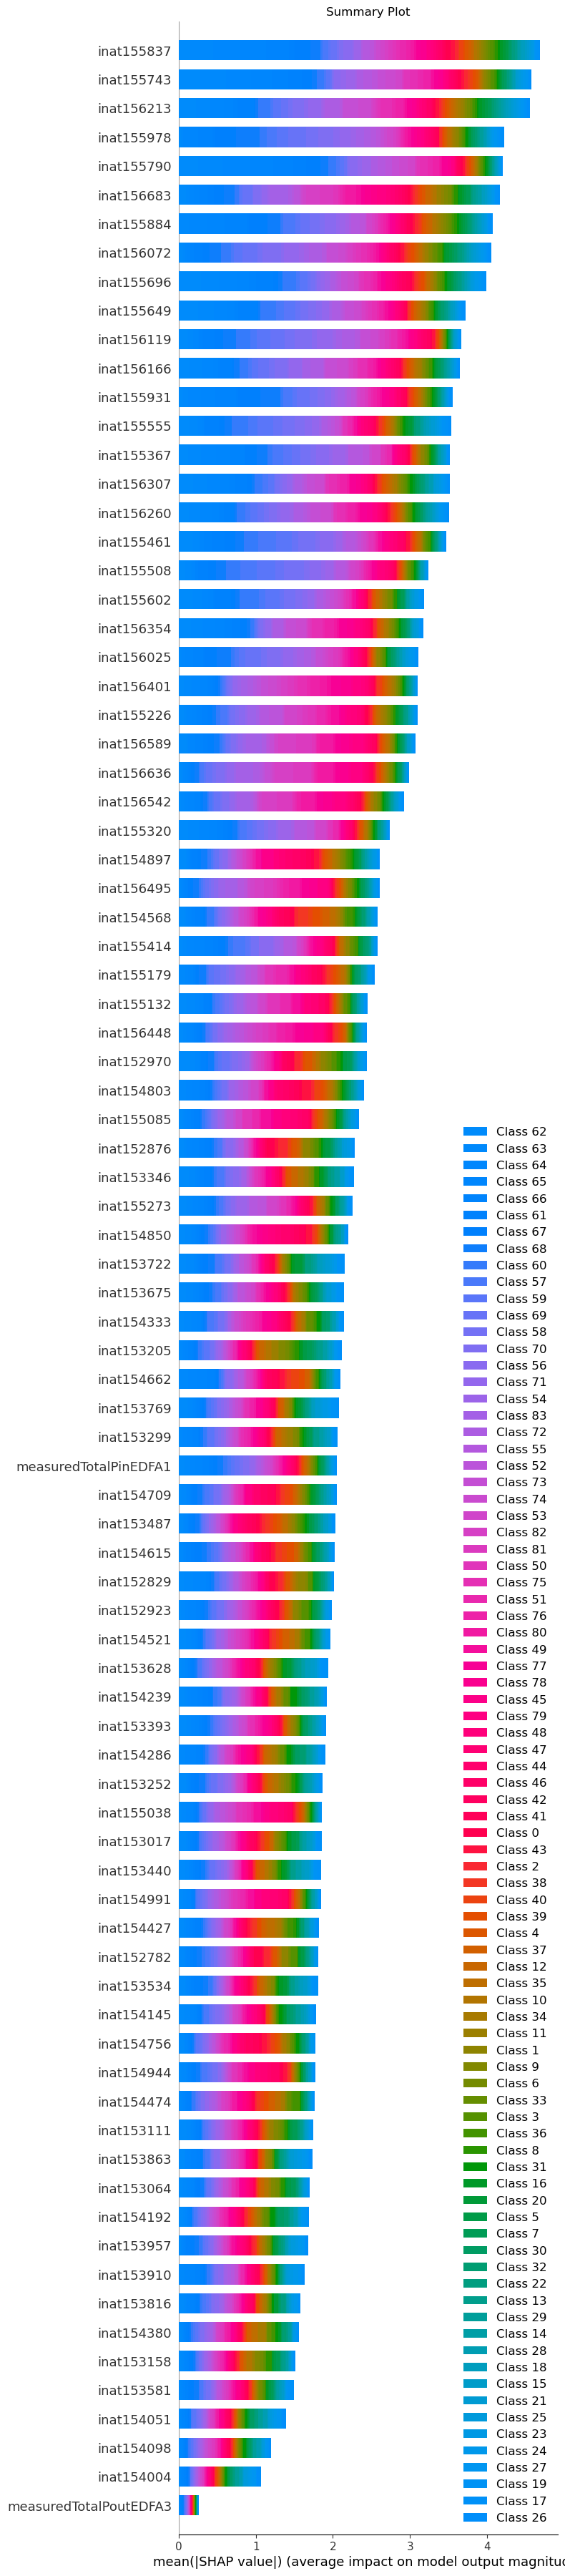

In [204]:

#We passed the method 4 arguments: 1) calculated SHAP values, 2) feature names, 3) show = False to not directly
#plot the figure and 4) max_display to specify the number of features to display in figure
shap.summary_plot(shap_values, feature_names=list(X.columns), show = False, max_display=100)
plt.title("Summary Plot")
plt.show()

# From Below Summary Plot for each output we can see most related input features. When we investigated; it is obvious that ; most important features are adjacent channels and some of the channels contributing by contradictory where they have inverse relation  

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


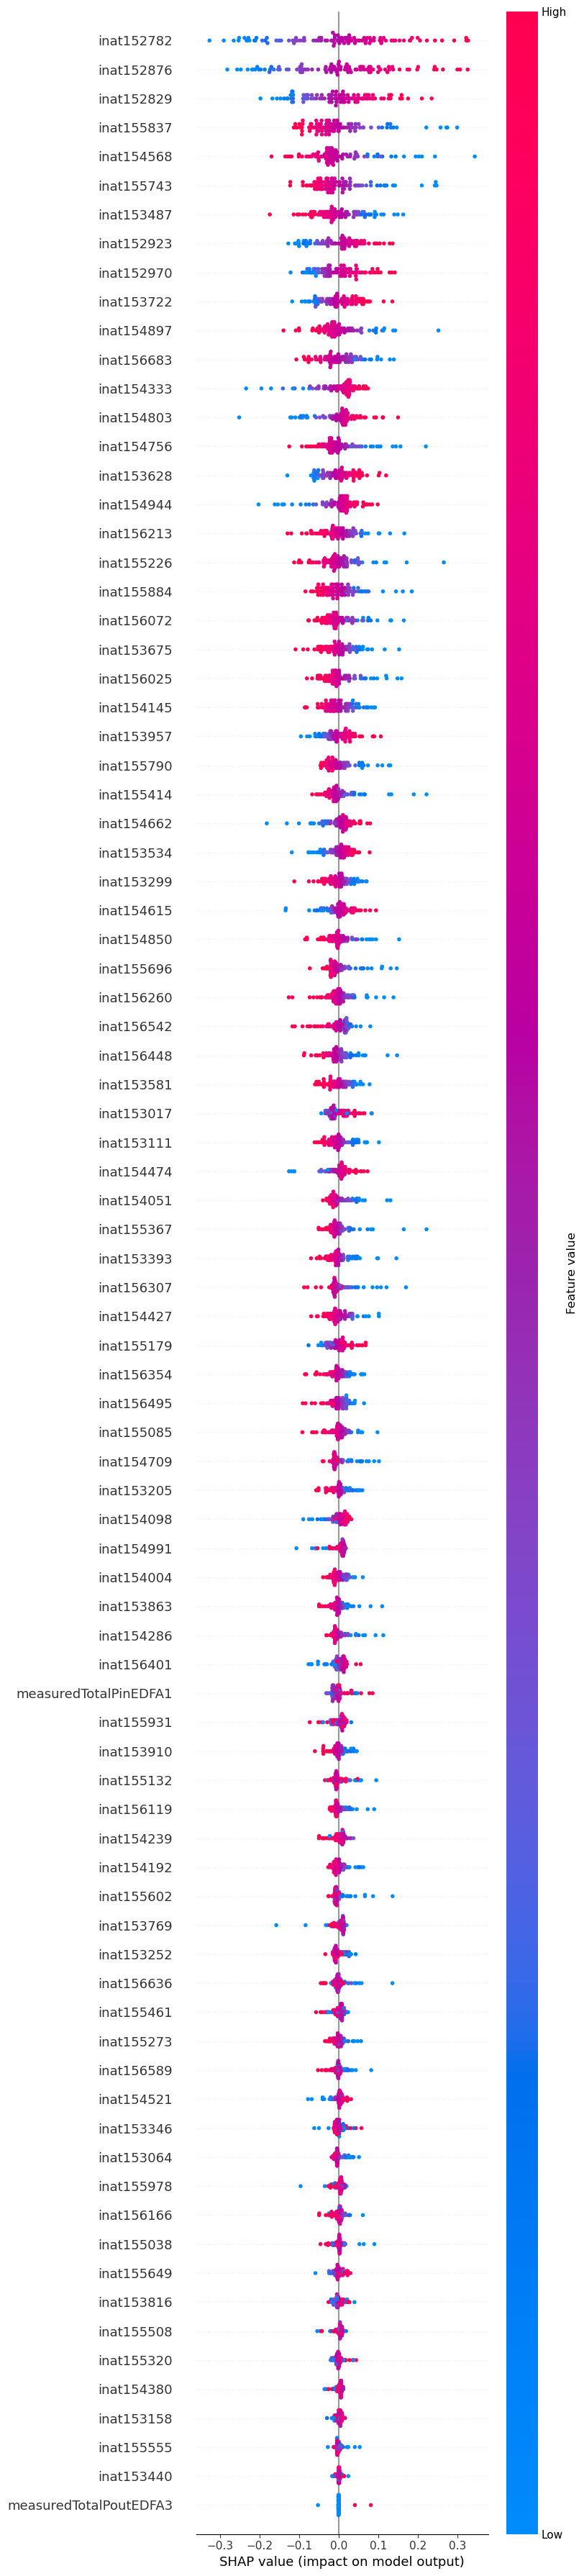

In [206]:
shap.summary_plot(shap_values[0], features=X_train_tensor[:shappoints], feature_names=list(X.columns), show = False, max_display=100)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


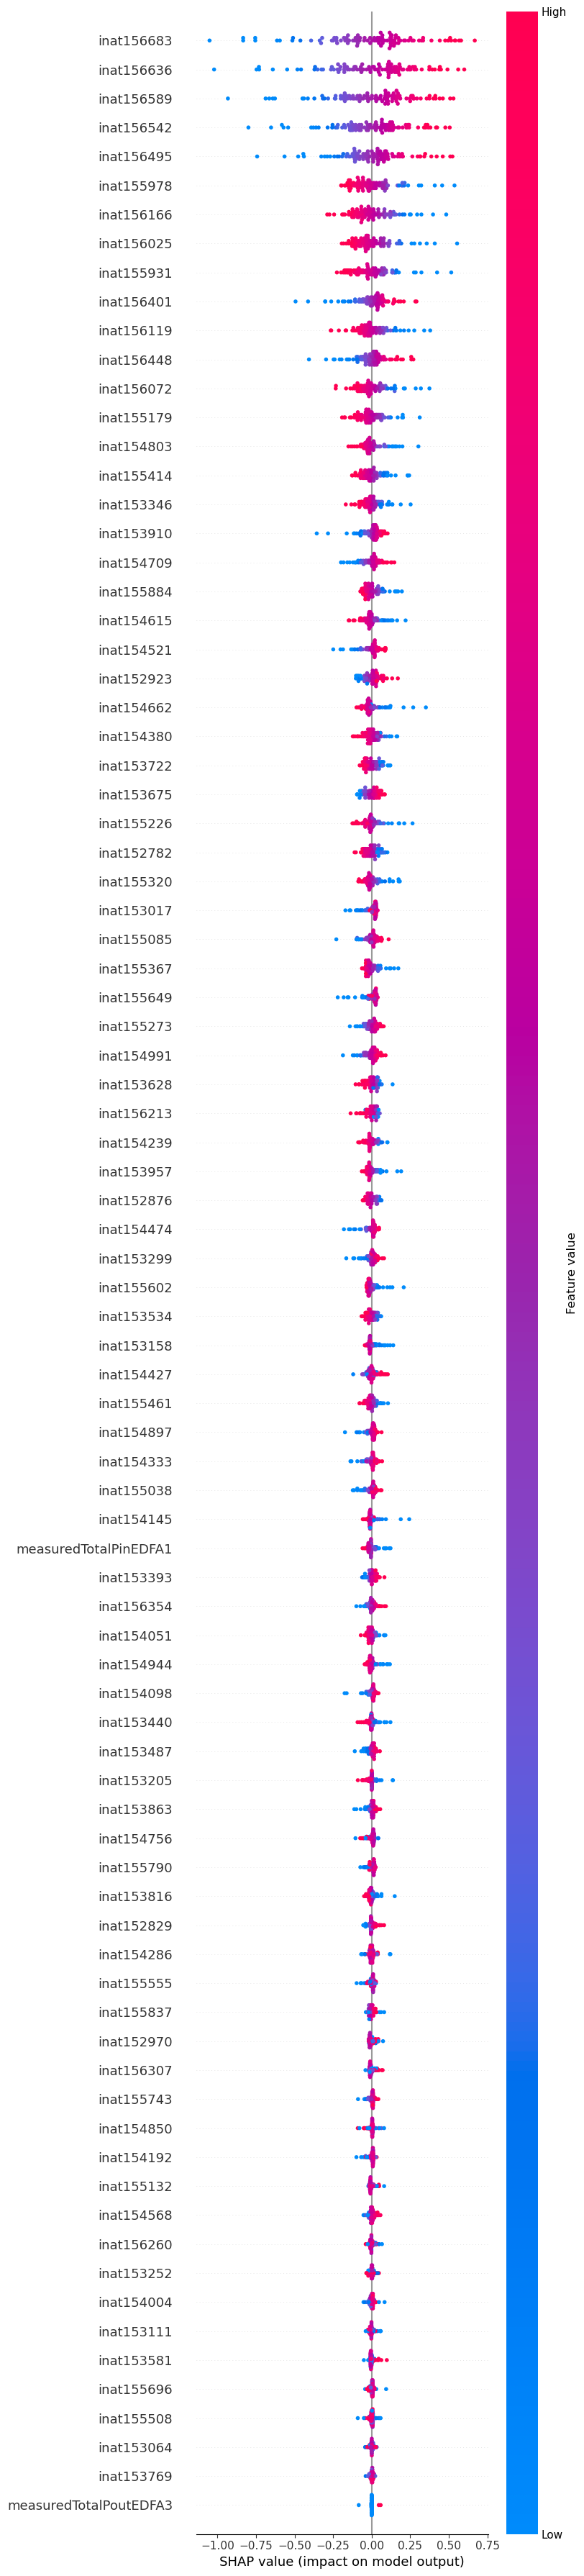

In [207]:
shap.summary_plot(shap_values[83], features=X_train_tensor[:shappoints], feature_names=list(X.columns), show = False, max_display=100)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


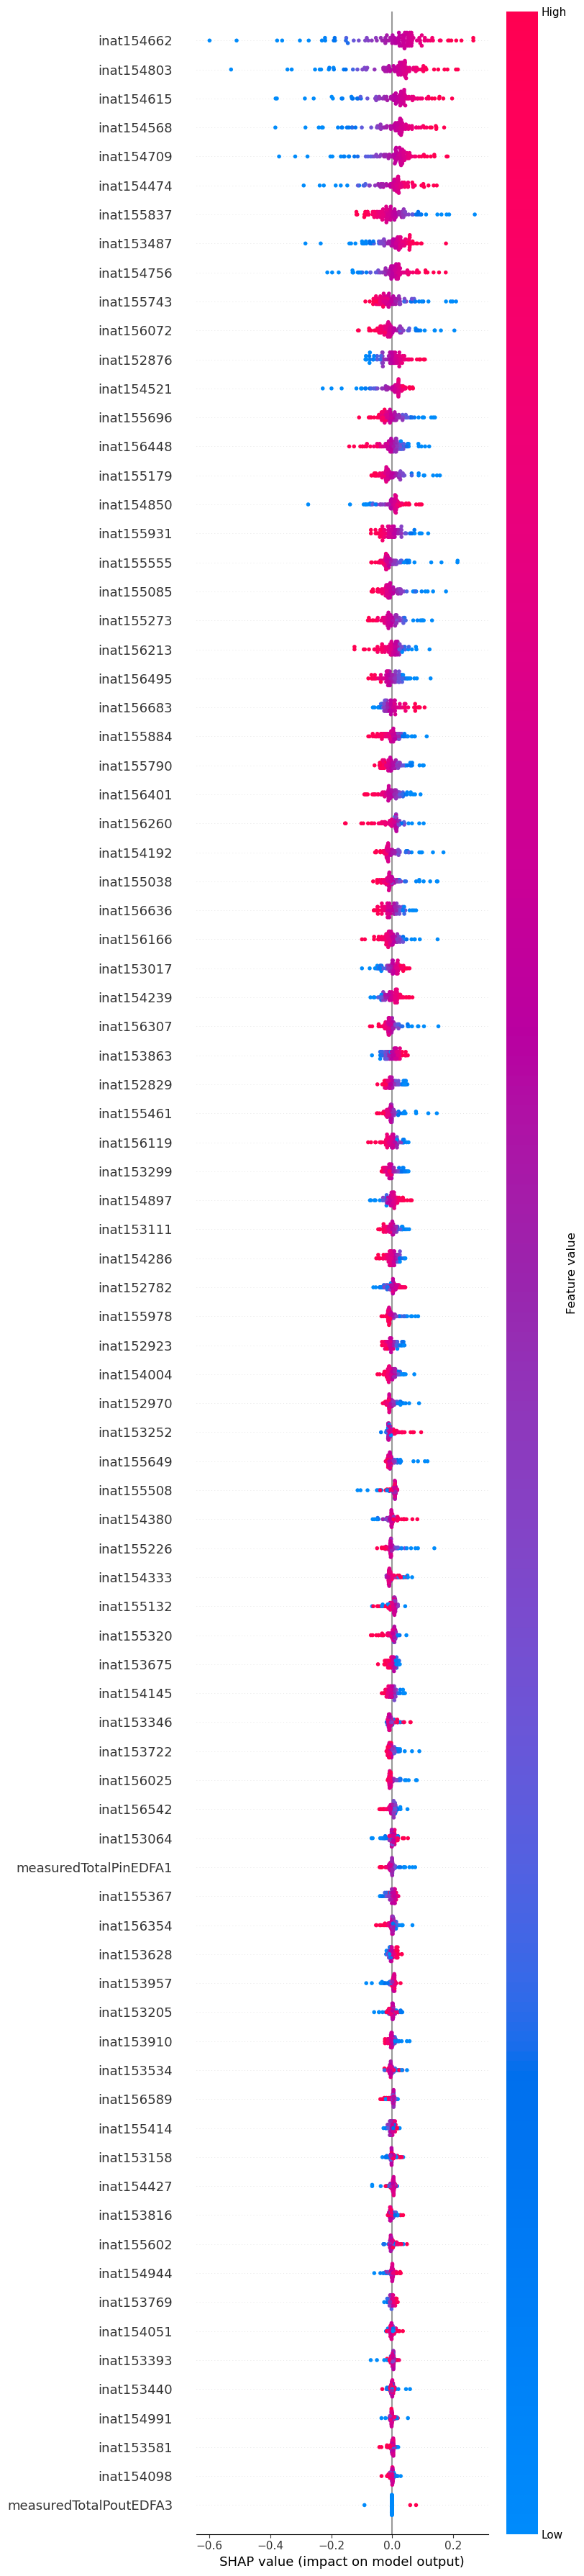

In [208]:
shap.summary_plot(shap_values[40], features=X_train_tensor[:shappoints], feature_names=list(X.columns), show = False, max_display=100)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


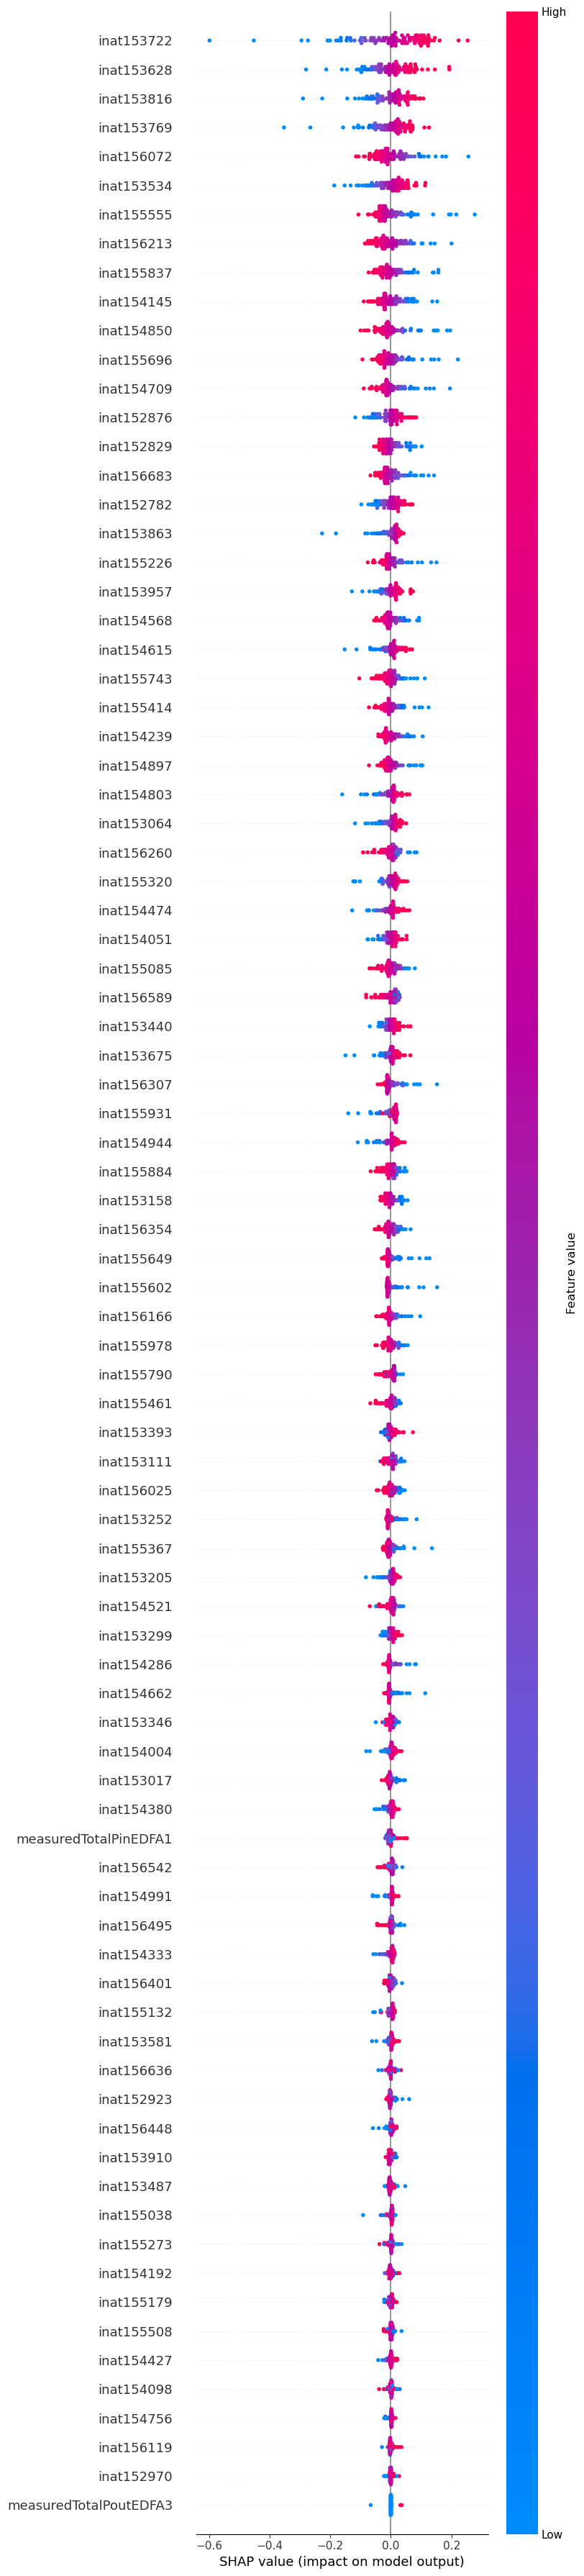

In [209]:
shap.summary_plot(shap_values[20], features=X_train_tensor[:shappoints], feature_names=list(X.columns), show = False, max_display=100)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


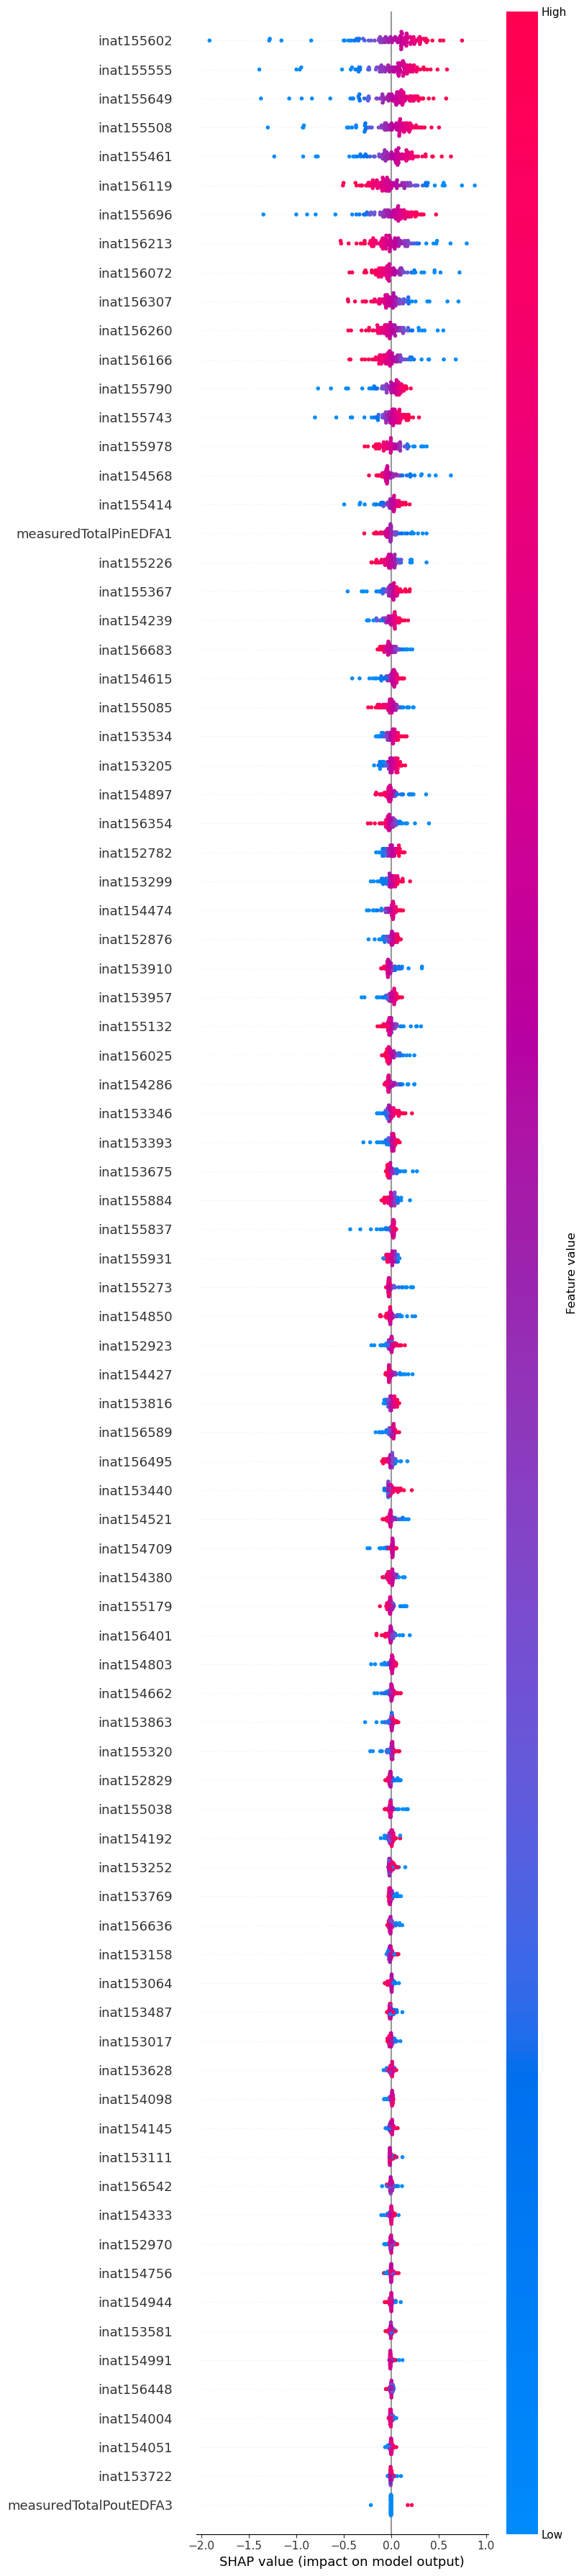

In [210]:
shap.summary_plot(shap_values[60], features=X_train_tensor[:shappoints], feature_names=list(X.columns), show = False, max_display=100)

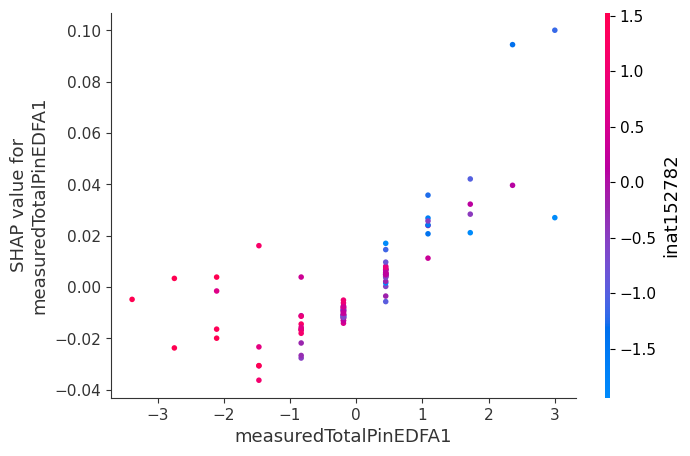

In [222]:
features_np = X_train_tensor[:shappoints].numpy()


shap.dependence_plot('measuredTotalPinEDFA1', shap_values[1], features=features_np, feature_names=list(X.columns),
                     interaction_index = 'inat152782')
plt.show()


# Visualizing predicted vs. actual output power profiles

In [46]:
def plot_actual_vs_predicted(actual_df, predicted_df, num_rows):
    num_plots = min(num_rows, len(actual_df), len(predicted_df))
    
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))  # Adjust size as necessary
    
    if num_plots == 1:
        axes = [axes]
    
    for i in range(num_plots):
        # Plot the actual vs. predicted for the ith row
        axes[i].plot(actual_df.iloc[i], label='Actual', marker='o')
        axes[i].plot(predicted_df.iloc[i], label='Predicted', marker='x')
        
        axes[i].set_title(f'Comparison of Actual vs. Predicted - Row {i+1}')
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel('Value')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()


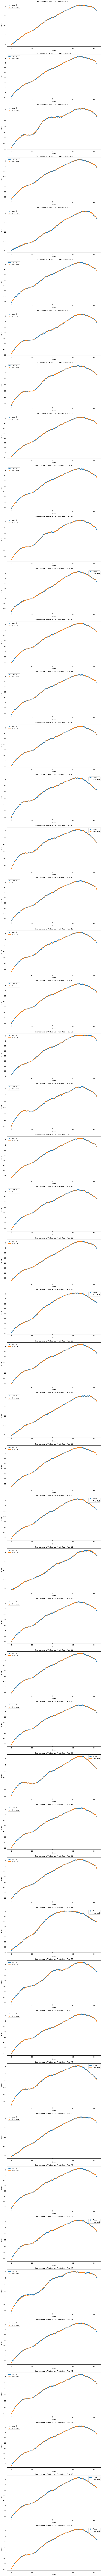

In [47]:
plot_actual_vs_predicted(actuals_df, predictions_df, num_rows=50)  
